<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4 / Supplementary*

---

# Probability, Odds, and Logit

### 선형회귀 모델의 예측값은 이론적으로 -$\infty$ ~ $\infty$의 값을 가질 수 있습니다.
- 하지만 현실 세계의 어떤 문제들은 정답의 범위가 제한적입니다.
- 예를 들어, 분류 문제의 경우 입력 데이터가 각 class에 속할 확률을 예측하는 것으로 볼 수 있고, 이때 예측값의 범위는 (확률이므로) 0~1의 범위를 가지면 좋습니다.

### 그래서 우리는 선형회귀 모델의 예측값에 어떤 함수를 씌움으로써, 예측값의 범위를 제한할 수 있습니다.

- 로지스틱 회귀의 경우 선형회귀 모델의 예측값에 $sigmoid$ 함수를 씌웁니다.
- $sigmoid$ 함수($\sigma$)는 아래와 같이 정의됩니다.

$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$

### $sigmoid$ 함수의 개형을 살펴볼까요?
- $sigmoid$ 함수는 $-\infty$ ~ $\infty$의 입력을 $0$ ~ $1$의 범위로 만들어 줍니다.

Text(0, 0.5, '$\\sigma(x)$')

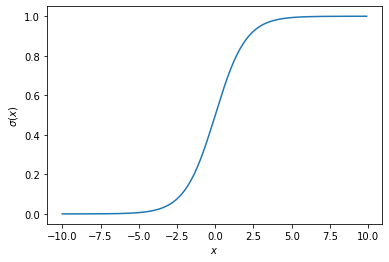

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x))
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")

### 그런데, $sigmoid$ 함수는 무슨 의미를 가질까요?
![logistic](https://i.imgur.com/0vn2ngT.png)

- 선형회귀 모델의 출력에 $sigmoid$ 함수를 씌운 것이 로지스틱 회귀 모델의 출력이고, 우리는 이를 확률로 해석하기로 했습니다.
- 그렇다면, $sigmoid$ 함수를 씌우기 전 값은 어떤 의미를 가질까요?
- $sigmoid$ 함수를 뜯어 봅시다.

### 확률(Probability)과 오즈(Odds)

$$ p = \sigma(y) = \frac{1}{1 + e^{-y}} $$

- 확률 $p$와 선형회귀의 출력 $y=\beta_0 + \beta_1 x_1 + ... + \beta_n x_n$에 대한 위 관계식을 $y$에 대해 정리해 봅시다.


$$ 
\begin{aligned}

    \frac{1}{p} - 1 
        &= \frac{1-p}{p} \\
        &= e^{-y} \\

    e^{y} 
        &= \frac{p}{1-p}

\end{aligned}
$$

### $ \frac{p}{1-p} $를 오즈(Odds)라고 합니다.
- 어떤 사건 $A$가 벌어질 확률을 $p$라고 한다면, $1-p$는 해당 사건이 벌어지지 않을 확률일 것입니다.
- 통계학에서, 어떤 사건 $A$에 대해 위와 같이 정의된 $p$가 있을 때, $p/(1-p)$를 오즈(Odds)라고 합니다.
- 다소 생소할 수 있지만, 오즈는 확률($p$)의 또 다른 표현 중 하나이며 어떤 사건의 승산을 직관적으로 표현하기 위해 종종 사용됩니다.
  - 경마장에서 어떤 말의 승률이 40%라고 합시다. 이 말의 승리에 대한 오즈는 $0.4/0.6=2/3$입니다.
  - 이 말은 다섯 게임 중 두 게임 정도를 이긴다는 뜻이죠.
  - 경마장에서는 실제로 각 말에 대한 오즈를 기반으로 환급 금액의 배율을 결정합니다.

Text(0, 0.5, '$odds(p)$')

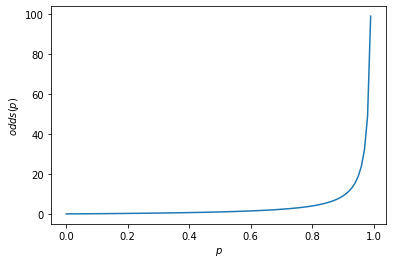

In [ ]:
def odds(p):
    return p / (1 - p)


p = np.arange(0, 1, 0.01)
plt.plot(p, odds(p))
plt.xlabel("$p$")
plt.ylabel("$odds(p)$")

### $ln(odds)$를 로짓(Logit)이라 합니다. 
- 위 그래프에서 확인할 수 있듯, 오즈는 $0$~$\infty$의 값을 갖고, $p$가 1에 가까워질수록 급격하게 값이 커집니다.
  - 어떤 말의 경기력 자체를 직관적으로 이해하고 싶다고 합시다. 그렇다면 그 말의 승률이 50%일 때가 기준이 될 것입니다.
    - 어떤 말의 승률이 50%라면 해당 말의 승리에 대한 오즈는 1입니다.
    - 어떤 말의 승률이 10%라면, 해당 말의 승리에 대한 오즈는 1/9=0.1111...이 되지요.
    - 어떤 말의 승률이 반대로 90%라면, 해당 말의 승리에 대한 오즈는 9/1=9가 됩니다. 기준값인 오즈=1로부터 엄청나게 크게 증가한 값이지요.
  - 즉, 오즈는 확률에 대해 비대칭적입니다.
- 하지만 오즈에 자연로그 $ln$을 씌우면 이를 대칭적으로 바꾸어줄 수 있습니다. 로짓은 아래와 같이 정의됩니다.

$$ 
    \begin{aligned} 
        logit(p) 
            &= ln(odds(p)) \\
            &= ln(\frac{p}{1-p})
    \end{aligned}
$$


- 말의 승률에 대한 확률, 오즈, 로짓값을 비교해 볼까요?
  - 오즈와 달리, 로짓은 확률에 대해 대칭적입니다.
  

| 확률 | 오즈 | 로짓 |
|:---:|:---:|:---:|
| 0.1 | 0.1111.... | ln(1/9)=-2.1972..|
| 0.5 | 1 | ln(1)=0 |
| 0.9 | 9 | ln(9)=+2.1972..|

/var/folders/gc/sh4qfh4j1c764lzmryjwxrww0000gp/T/ipykernel_507/3098517152.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(p / (1-p))


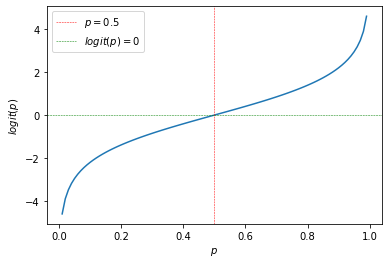

In [ ]:
def logit(p):
    return np.log(p / (1 - p))


p = np.arange(0, 1, 0.01)
plt.plot(p, logit(p))
plt.xlabel("$p$")
plt.ylabel("$logit(p)$")
plt.axvline(0.5, color="r", linestyle="--", linewidth=0.5, label="$p=0.5$")
plt.axhline(0, color="g", linestyle="--", linewidth=0.5, label="$logit(p)=0$")
plt.legend()

### 결국, 로지스틱 회귀에서 선형회귀 모델의 출력값은 우리가 예측하고자 하는 확률의 로짓입니다.
- **로지스틱 회귀에서 p를 예측하는 행위**는 결과적으로 **선형회귀 모델로 p의 로짓을 예측하는 행위**와 동일합니다.
- 그렇다면, 로지스틱 회귀에서는 회귀 계수를 어떻게 이해하면 좋을까요?

### 로지스틱 회귀의 회귀 계수에 대한 이해
- 아래와 같은 선형회귀식을 생각해 봅시다.
  
  $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

- 위 식에서 우리는 $\beta_i$의 해석을 아래와 같이 했었습니다.
  
    **$x_i$가** 1만큼 증가할 때, **$y$가** $\beta_i$만큼 증가한다.
  
- 로지스틱 회귀는 결국 선형 회귀로 로짓을 예측하는 것이라고 했기 때문에, 아래와 같이 해석할 수 있습니다.

    **$x_i$가** 1만큼 증가할 때, **해당 입력 데이터가 1로 분류될 확률의 $logit(p)$이** $\beta_i$만큼 증가한다.

- 그리고 $odds = e^{logit}$ 이므로, 아래의 관계가 성립합니다.



|         | $x_i$ |  $x_i + 1$ |  변화 |
|:-------:|:-----:|:----------:|:----:|
| **로짓** | $logit$   | $logit + \beta_i$ | $+\beta_i$ |
| **오즈** | $e^{logit}$  | $e^{(logit + \beta_i)} = e^{logit}e^{\beta_i}$ |  $\times e^{\beta_i}$ |




  - 즉, **$x_i$가** 1만큼 증가할 때, **$odds(p)$이** $e^{\beta_i}$배가 되는 것입니다.


![lin_log](https://i.imgur.com/dQyIN9t.png)